In [1]:
# Installing essential libraries
!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install seaborn
!pip install matplotlib

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('Bank_Marketing.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
data.shape

(45211, 17)

In [6]:
#with this code we checking if there is any null values We can have 2 main strategies here:
#1) remove missing values. 2) fill missing values.Fill with Mean or Median (for numerical columns)

#Fill with Mode (for categorical columns)

#Fill with a Specific Value

In [7]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [9]:
data.describe(include='O').T

,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


In [10]:
data = data.rename(columns={'y' : 'outcome'})
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'outcome'],
      dtype='object')

In [11]:
data['outcome'] = data['outcome'].replace({'yes': 'deposit', 'no': 'no-deposit'})

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

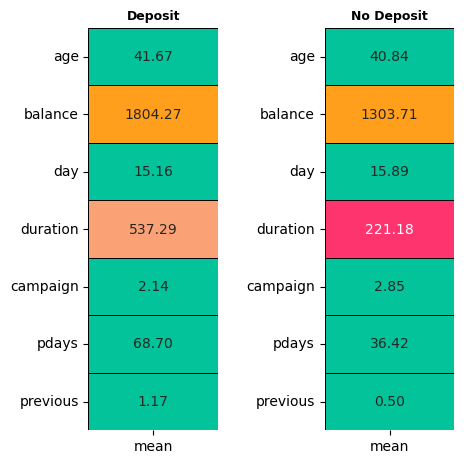

In [13]:
Deposit = data[data['outcome'] == 'deposit'].describe().T
no_Deposit = data[data['outcome'] == 'no-deposit'].describe().T

colors = ['#02c39a', '#512b58', '#fe346e', '#faa275', '#ff9b54', '#6fffe9', '#63474d',
          '#373f51', '#1b1b1e', '#e71d36', '#011627', '#ff9f1c']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(Deposit[['mean']],annot = True, cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Deposit', fontsize=9, fontweight='bold')


plt.subplot(1,2,2)
sns.heatmap(no_Deposit[['mean']],annot = True, cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Deposit', fontsize=9, fontweight='bold')

fig.tight_layout(pad = 2)

In [14]:
#we are seprating numerical and catagorical features for analysis

numerical_features = []
categorical_features = []

for column in list(data.columns):
    if data[column].dtypes == 'O':
        categorical_features.append(column)
    else:
        numerical_features.append(column)

print("Numerical Features:")
print(numerical_features)
print("\nCategorical Features:")
print(categorical_features)

Numerical Features:
['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical Features:
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'outcome']


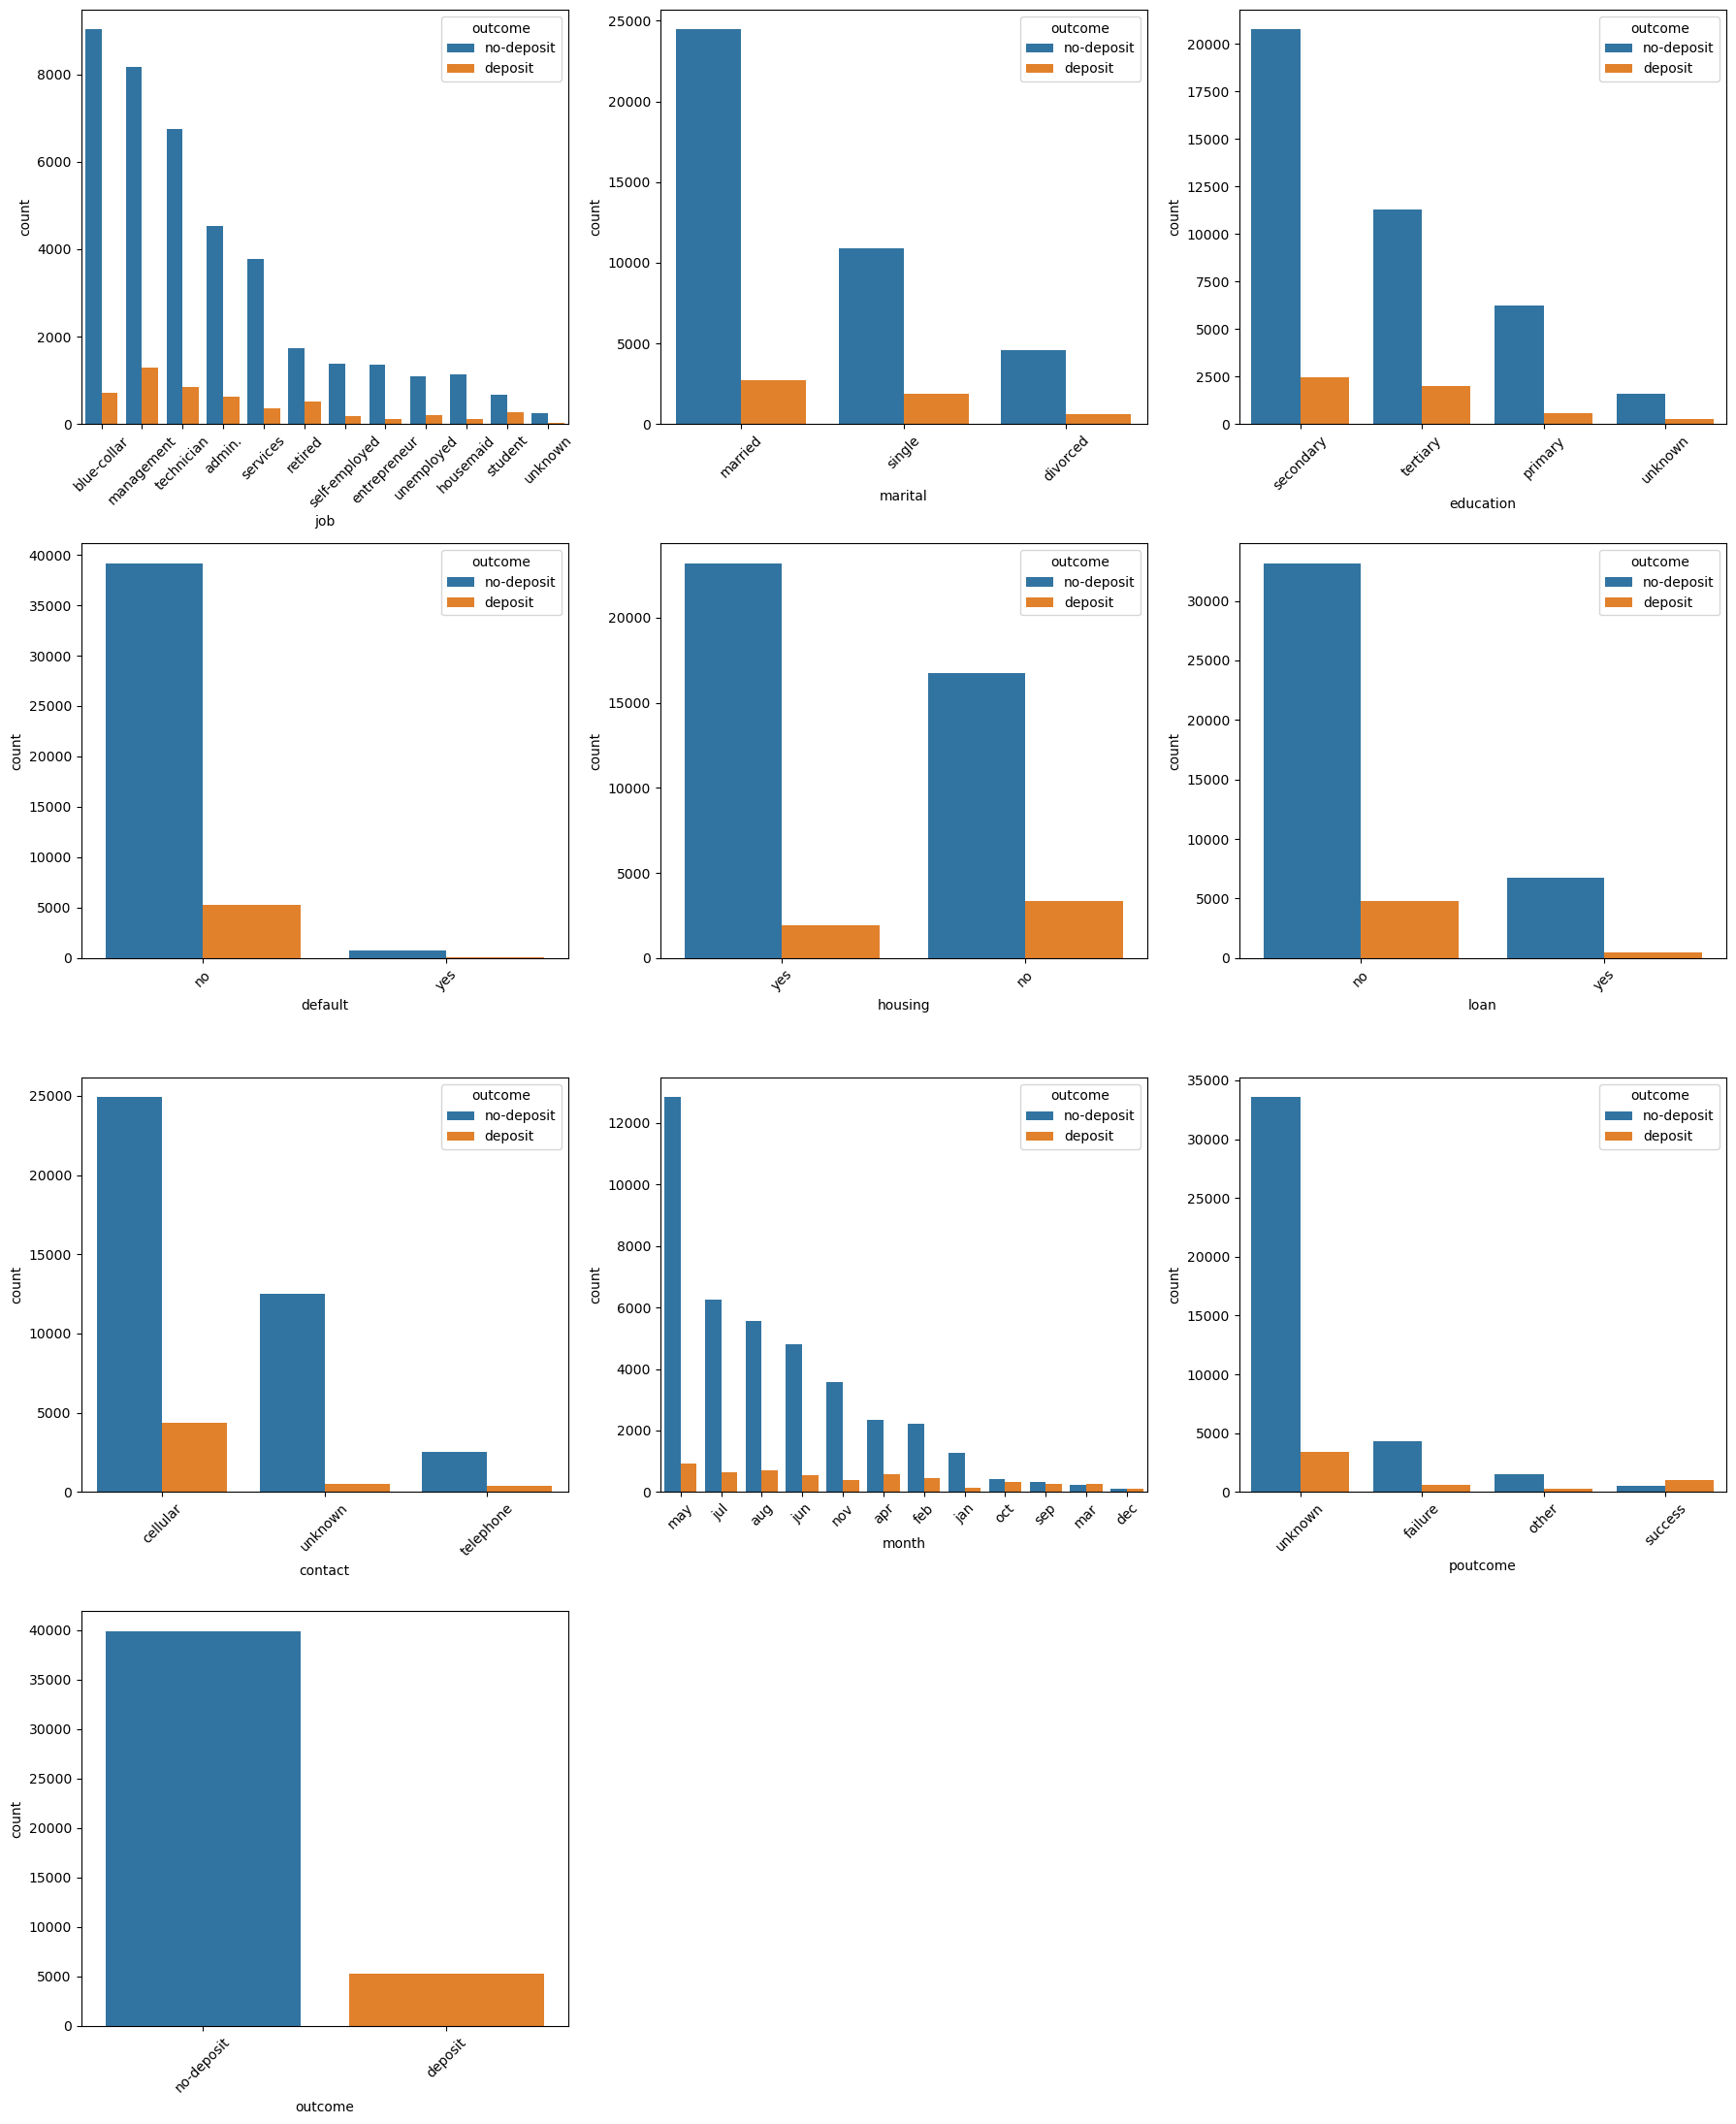

In [15]:
#categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
plt.figure(figsize=(18, 22))
n = 1
for column in categorical_features:
    # Adjust the subplot grid to accommodate all categorical features
    ax = plt.subplot(4, 3, n)  # Adjust the number of rows/columns as needed
    sns.countplot(x=column, hue='outcome', data=data, order=data[column].value_counts().index)
    plt.xlabel(column)
    plt.xticks(rotation=45)  # Rotate x-tick labels by 45 degrees
    plt.tight_layout()
    n += 1

# Show all plots together after the loop
plt.show()

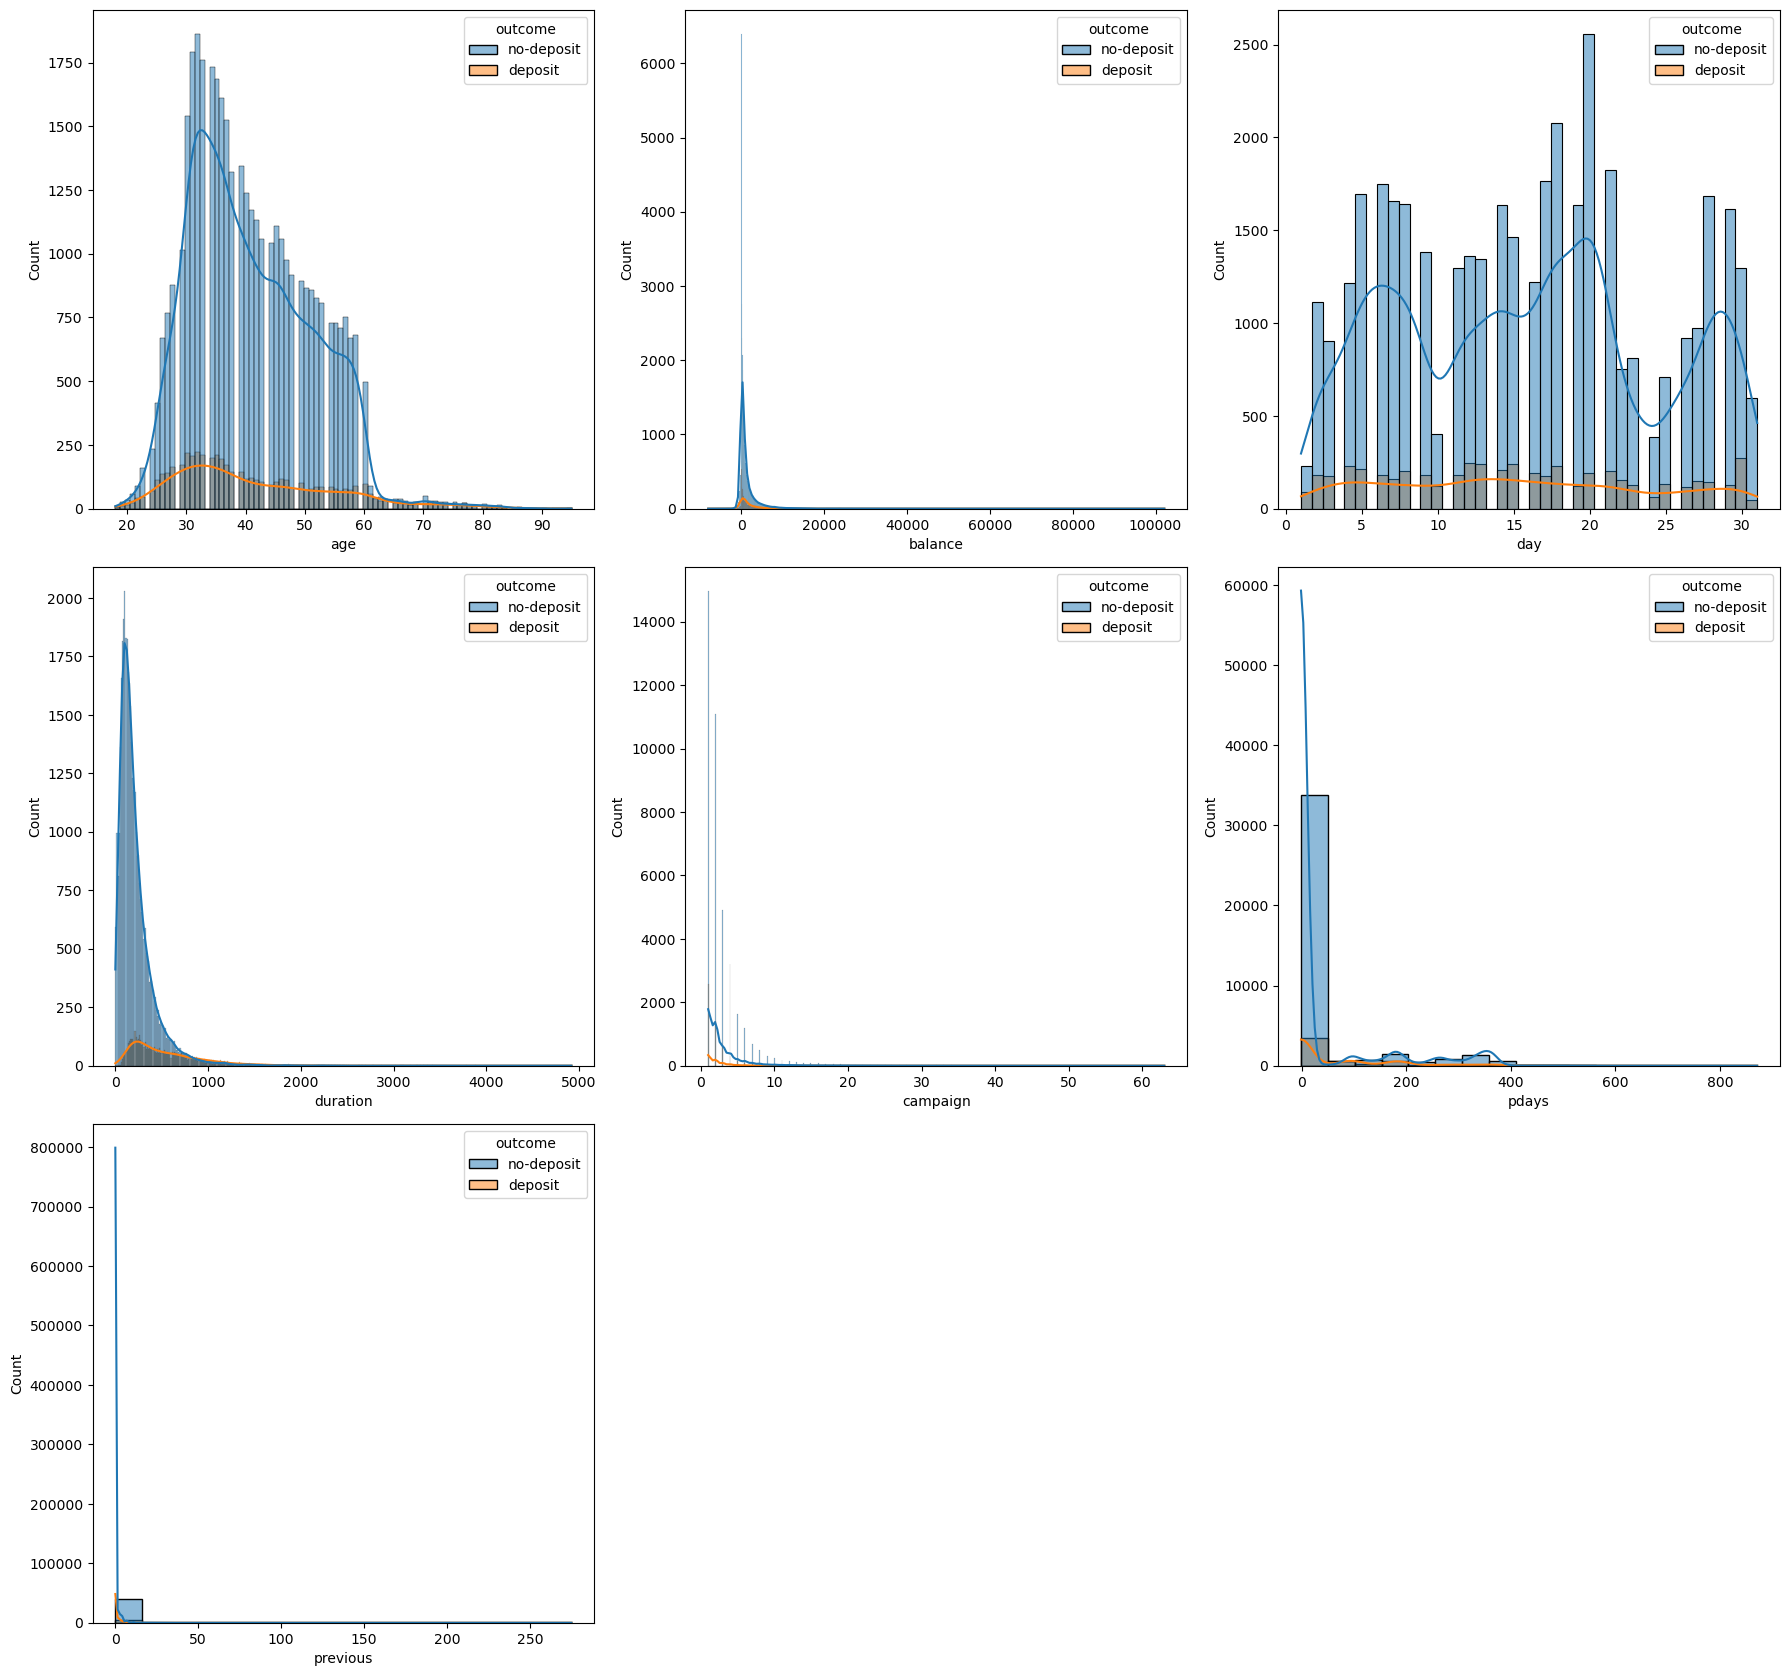

In [16]:
#Numerical=['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(18,22))
n = 1
for column in numerical_features:
  # Adjust the subplot grid to accommodate all numerical features
  ax = plt.subplot(4, 3, n)  # Adjust the number of rows/columns as needed
  # Pass the column name directly as the 'x' argument without enclosing it in a list.
  sns.histplot(x=column, hue='outcome', data=data, kde=True, color='green', element='bars')
  plt.xlabel(column)
  plt.tight_layout()
  n += 1
    
# Show all plots together after the loop
plt.show() 

In [17]:
# # ploting a boxplot for numerical features to check the outliers
# columns = ['age','balance']
# plt.figure(figsize=(22,5))
# n = 1
# for col in columns:
#   ax = plt.subplot(1,2,n)
#   sns.boxplot(x=data[col], color='red')
#   plt.xlabel(col)
#   n += 1
# plt.show()

In [18]:
from sklearn.preprocessing import StandardScaler

columns_to_standard = numerical_features
scaler_stan = StandardScaler()


data[columns_to_standard] = scaler_stan.fit_transform(data[columns_to_standard])

data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,1.606965,management,married,tertiary,no,0.256419,yes,no,unknown,-1.298476,may,0.011016,-0.569351,-0.411453,-0.25194,unknown,no-deposit
1,0.288529,technician,single,secondary,no,-0.437895,yes,no,unknown,-1.298476,may,-0.416127,-0.569351,-0.411453,-0.25194,unknown,no-deposit
2,-0.747384,entrepreneur,married,secondary,no,-0.446762,yes,yes,unknown,-1.298476,may,-0.707361,-0.569351,-0.411453,-0.25194,unknown,no-deposit
3,0.571051,blue-collar,married,unknown,no,0.047205,yes,no,unknown,-1.298476,may,-0.645231,-0.569351,-0.411453,-0.25194,unknown,no-deposit
4,-0.747384,unknown,single,unknown,no,-0.447091,no,no,unknown,-1.298476,may,-0.233620,-0.569351,-0.411453,-0.25194,unknown,no-deposit


In [19]:
data = data.drop(data[(data['job'] == 'unknown') | (data['education'] == 'unknown')].index)
data.shape

(43193, 17)

In [20]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for column in categorical_features:
    data[column] = encoder.fit_transform(data[column])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,1
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,1
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,1
5,-0.559037,4,1,2,0,-0.371551,1,0,2,-1.298476,8,-0.462724,-0.569351,-0.411453,-0.25194,3,1
6,-1.218254,4,2,2,0,-0.300608,1,1,2,-1.298476,8,-0.159841,-0.569351,-0.411453,-0.25194,3,1


In [21]:
data['outcome'].replace({0 : 1, 1 : 0}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,outcome
0,1.606965,4,1,2,0,0.256419,1,0,2,-1.298476,8,0.011016,-0.569351,-0.411453,-0.25194,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,-1.298476,8,-0.416127,-0.569351,-0.411453,-0.25194,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,-1.298476,8,-0.707361,-0.569351,-0.411453,-0.25194,3,0
5,-0.559037,4,1,2,0,-0.371551,1,0,2,-1.298476,8,-0.462724,-0.569351,-0.411453,-0.25194,3,0
6,-1.218254,4,2,2,0,-0.300608,1,1,2,-1.298476,8,-0.159841,-0.569351,-0.411453,-0.25194,3,0


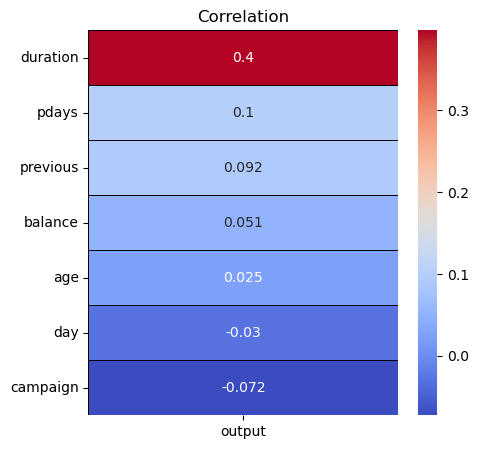

In [22]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler, StandardScaler
plt.figure(figsize=(5,5))

corr = data[numerical_features].corrwith(data['outcome']).sort_values(ascending = False).to_frame()
corr.columns = ['output']
sns.heatmap(corr,annot = True,cmap = 'coolwarm',linewidths = 0.4,linecolor = 'black');
plt.title('Correlation')
plt.show()

In [23]:
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np

# List of categorical features, including the target column 'outcome'
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'outcome']

# Function to calculate Cramér's V
def cramers_v(x, y):
    chi2, _, _, _ = chi2_contingency(pd.crosstab(x, y))
    n = len(x)
    return np.sqrt(chi2 / (n * (min(pd.crosstab(x, y).shape) - 1)))

# Calculate Cramér's V for each categorical feature against 'outcome'
output = data['outcome']
cramer_vs = {col: cramers_v(data[col], output) for col in categorical_features if col != 'outcome'}

# Sort the results in descending order by Cramér's V values
sorted_cramer_vs = sorted(cramer_vs.items(), key=lambda x: x[1], reverse=True)

# Print results
for col, cramer_v in sorted_cramer_vs:
    print(f"Cramér's V for '{col}': {cramer_v:.2f}")    

Cramér's V for 'poutcome': 0.31
Cramér's V for 'month': 0.26
Cramér's V for 'contact': 0.15
Cramér's V for 'housing': 0.14
Cramér's V for 'job': 0.13
Cramér's V for 'education': 0.07
Cramér's V for 'loan': 0.07
Cramér's V for 'marital': 0.07
Cramér's V for 'default': 0.02


In [24]:
data['outcome'].value_counts()

outcome
0    38172
1     5021
Name: count, dtype: int64

In [25]:
final_data = data[['job', 'housing', 'contact', 'poutcome', 'month', 'outcome', 'duration', 'previous', 'pdays']]

In [26]:
 final_data.head()

,job,housing,contact,poutcome,month,outcome,duration,previous,pdays
0,4,1,2,3,8,0,0.011016,-0.25194,-0.411453
1,9,1,2,3,8,0,-0.416127,-0.25194,-0.411453
2,2,1,2,3,8,0,-0.707361,-0.25194,-0.411453
5,4,1,2,3,8,0,-0.462724,-0.25194,-0.411453
6,4,1,2,3,8,0,-0.159841,-0.25194,-0.411453


In [27]:
final_data.dtypes

job           int32
housing       int32
contact       int32
poutcome      int32
month         int32
outcome       int32
duration    float64
previous    float64
pdays       float64
dtype: object

In [28]:
final_data['outcome'].value_counts()

outcome
0    38172
1     5021
Name: count, dtype: int64

In [29]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [30]:
from sklearn.model_selection import train_test_split

X = final_data.drop(columns=['outcome'])
y = final_data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,stratify=y, random_state=101)

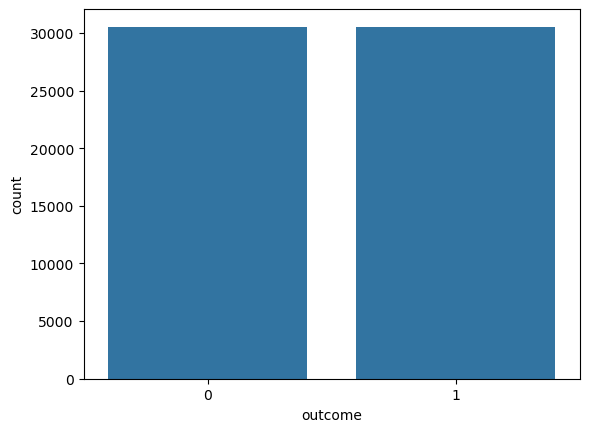

In [31]:
import imblearn
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline

resampler=RandomOverSampler(random_state=0)
X_train_oversampled,y_train_oversampled=resampler.fit_resample(X_train,y_train)
sns.countplot(x=y_train_oversampled)
plt.show()

In [32]:
 pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report, accuracy_score

In [35]:
def perform_grid_search_with_best_score(model, param_grid, X_train, y_train, X_test, y_test):

    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    y_pred = best_model.predict(X_test)
    test_score = accuracy_score(y_test, y_pred)
    return best_params, test_score

def model_evaluation(classifier,x_test,y_test):

    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

def plot_roc_curve(y_true, y_scores):
    # Calculate the false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    # Calculate the area under the ROC curve (AUC)
    auc = roc_auc_score(y_true, y_scores)
    # Plot the ROC curve
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [36]:
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score
# from sklearn.model_selection import GridSearchCV
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Perform grid search and return the best parameters and test accuracy
# def perform_grid_search_with_best_score(model, param_grid, X_train, y_train, X_test, y_test):
#     # grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
#     # grid_search.fit(X_train, y_train)
#     # best_model = grid_search.best_estimator_
#     # y_pred = best_model.predict(X_test)
#     # return grid_search.best_params_, accuracy_score(y_test, y_pred)

# # Evaluate the model with confusion matrix and classification report
# def model_evaluation(classifier, x_test, y_test):
#     cm = confusion_matrix(y_test, classifier.predict(x_test))
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
#                 xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
#     plt.title("Confusion Matrix")
#     plt.xlabel("Predicted")
#     plt.ylabel("Actual")
#     plt.show()
#     print(classification_report(y_test, classifier.predict(x_test)))

# # Plot ROC curve
# def plot_roc_curve(y_true, y_scores):
#     fpr, tpr, _ = roc_curve(y_true, y_scores)
#     auc = roc_auc_score(y_true, y_scores)
#     plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
#     plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (random classifier)
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('ROC Curve')
#     plt.legend(loc='lower right')
#     plt.show()


In [37]:
# Define the KNN model
knn = KNeighborsClassifier()
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
# Perform grid search and get the best parameters and test score
best_params, test_score = perform_grid_search_with_best_score(knn, param_grid, X_train, y_train, X_test, y_test)
# Print the best parameters and test score
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'algorithm': 'brute', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Test Score (Accuracy): 0.8983678666512328


In [38]:
knn = KNeighborsClassifier(algorithm = 'auto', n_neighbors = 9, p = 1, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9, p=1, weights='distance')

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7635
           1       0.53      0.40      0.45      1004

    accuracy                           0.89      8639
   macro avg       0.73      0.68      0.70      8639
weighted avg       0.88      0.89      0.88      8639



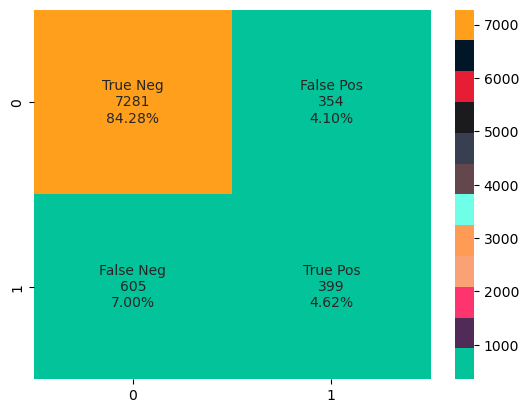

In [39]:
model_evaluation(knn, X_test, y_test)

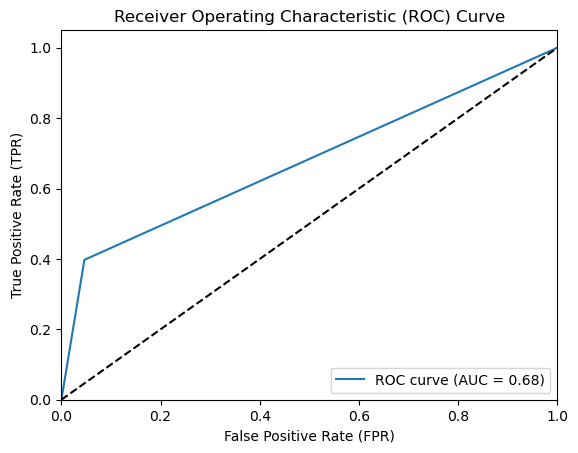

In [40]:
knn_prediction = knn.predict(X_test)
plot_roc_curve(y_test, knn_prediction)

In [41]:
RF = RandomForestClassifier(random_state=101)

    # Define the parameter grid
param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    # Perform grid search and evaluate best model
best_params, test_score = perform_grid_search_with_best_score(RF, param_grid, X_train, y_train, X_test, y_test)
    # Print results
print("Best Parameters:", best_params)
print("Test Score (Accuracy):", test_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Test Score (Accuracy): 0.9060076397731219


In [42]:
RF = RandomForestClassifier(random_state=101, max_depth = 20, min_samples_leaf = 2,
                                 min_samples_split = 10, n_estimators = 50)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=101)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7635
           1       0.65      0.40      0.50      1004

    accuracy                           0.91      8639
   macro avg       0.79      0.69      0.72      8639
weighted avg       0.89      0.91      0.90      8639



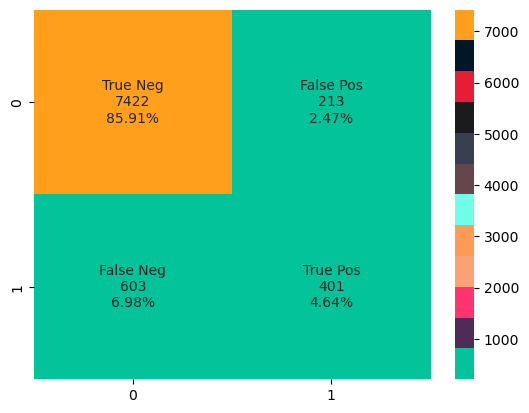

In [43]:
model_evaluation(RF, X_test, y_test)

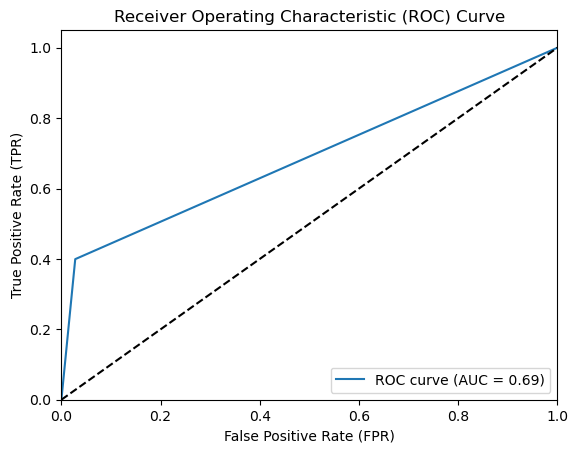

In [44]:
RF_prediction = RF.predict(X_test)
plot_roc_curve(y_test, RF_prediction)